## Classification.  Handling Imbalanced Data with upsampling

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
pd.set_option('display.max_rows', 200)

In [2]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## Check the datatypes of all the columns in the data

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting TotalCharges column into numeric type

In [5]:
#churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"])
#We find some errors on that column (empty values, not NaN)

In [6]:
churnData.loc[488, 'TotalCharges']

' '

In [7]:
#If ‘coerce’, then invalid parsing will be set as NaN.
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')

### Check for null values and replace them

In [8]:
churnData.isnull().values.any()

True

In [9]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [10]:
churnData=churnData.fillna(churnData.mean())

In [11]:
churnData["TotalCharges"].mean()

2283.3004408418697

In [12]:
churnData["TotalCharges"][churnData["TotalCharges"] > 0].mean()

2283.3004408418697

In [13]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [14]:
churnData["Churn"] = churnData["Churn"].replace(('Yes','No'),(1,0))
churnData["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Check for imbalance data

In [15]:
churnData["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- Our target value is not good balanced

### Unsampling method to balance data

In [16]:
category_0 = churnData[churnData["Churn"] == 0]
category_1 = churnData[churnData["Churn"] == 1]

In [17]:
len(category_0), len(category_1)

(5174, 1869)

In [18]:
category_1_up = category_1.sample(len(category_0), replace=True)
category_1_up.shape  #minority becomes equals that majority class

(5174, 16)

In [19]:
category_0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.40,0
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.90,0


In [20]:
category_1_up.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
4259,Female,0,No,No,3,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,19.60,59.75,1
5481,Male,1,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,73.65,73.65,1
82,Female,0,Yes,No,7,Yes,No,No,Yes,No,No,No,Month-to-month,75.15,496.90,1
4811,Female,0,No,No,4,Yes,No,No,No,No,No,No,Month-to-month,46.00,193.60,1
1097,Male,0,Yes,Yes,25,Yes,No,No,No,No,Yes,Yes,One year,90.40,2178.60,1


In [21]:
data = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
data = data.sample(frac=1)

In [22]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
3171,Female,0,No,No,21,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.85,435.25,0
509,Female,0,No,No,1,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,19.85,19.85,0
4563,Female,0,No,No,10,Yes,No,Yes,No,No,No,No,Month-to-month,80.05,830.70,1
3623,Male,1,Yes,No,37,Yes,No,No,No,No,No,No,Month-to-month,72.25,2575.45,0
5628,Female,0,No,No,13,Yes,Yes,Yes,No,No,Yes,No,Month-to-month,96.65,1244.50,1


In [23]:
len(data), len(churnData)

(10348, 7043)

In [24]:
data['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

- We have "upgraded" row with values 1 to have same len that values 0 in order to balance the dataset. For this reason, now we have a dataframe of 10348

### Split the data into a training set and a test set just using 4 features

- tenure: Number of months the customer has stayed with the company (Multiple different numeric values)
- SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
- TotalCharges: The total amount charged to the customer (Multiple different numeric values).

In [25]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']]
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [26]:
X_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
504,69,0,79.45,5502.55
3252,17,0,62.10,1096.65
4884,41,0,94.90,3848.00
6331,47,0,40.30,1794.80
4687,22,0,94.70,1914.90
...,...,...,...,...
2488,31,0,55.25,1715.65
367,1,0,19.15,19.15
2124,5,0,24.95,100.40
6625,12,1,91.30,1094.50


## 01. Logistic Regression model

In [27]:
log_model = LogisticRegression() 

### Scale the features 

In [28]:
#transform data
trans = StandardScaler()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

- Change again X_train_mod and X_test mod to dataframe

In [29]:
X_train_mod = pd.DataFrame(X_train_mod, columns= X.columns)
X_test_mod = pd.DataFrame(X_test_mod, columns= X.columns)

In [30]:
X_train_mod.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1.089495,2.051723,0.202229,0.854015
1,1.796392,2.051723,1.367767,2.589522
2,1.463734,-0.487395,-1.702642,-0.372467
3,-1.031195,-0.487395,-1.493889,-0.911611
4,0.174687,-0.487395,0.974615,0.517493


In [31]:
#Fitting data
log_model.fit(X_train_mod, y_train)

LogisticRegression()

### Make Predictions

In [32]:
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

In [33]:
y_pred_train_log

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
y_pred_test_log

array([0, 1, 0, ..., 0, 1, 0])

## Confusion Matrix

- We have to state that our positive label is Yes (and negative label is No), instead of 0, which is the default value

,Error_metric,Train,Test
0,Accuracy,0.735202,0.741063
1,Precision,0.731150,0.733591
2,Recall,0.746991,0.745098


Confusion matrix for the train set
[[2983 1141]
 [1051 3103]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


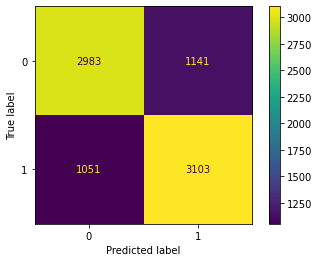



Confusion matrix for the test set
[[774 276]
 [260 760]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


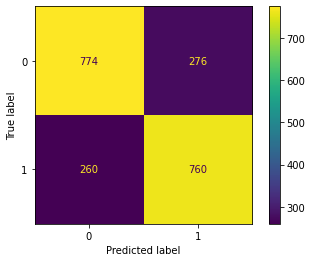

In [35]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label =1),
                                         recall_score(y_train, y_pred_train_log,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label = 1),
                                        recall_score(y_test, y_pred_test_log,pos_label = 1
                                                    )]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## 02. KNN CLASSIFIER


In [36]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train_mod, y_train)  #X_train_mod is the scaled version

KNeighborsClassifier(n_neighbors=20)

### Make Predictions on KNN

In [37]:
y_pred_train_knn = neigh.predict(X_train_mod)
y_pred_test_knn = neigh.predict(X_test_mod)

In [38]:
y_pred_train_knn

array([0, 0, 0, ..., 1, 0, 0])

In [39]:
y_pred_test_knn

array([0, 0, 0, ..., 0, 1, 0])

### Confusion matrix on KNN with k=20

,Error_metric,Train,Test
0,Accuracy,0.773496,0.754106
1,Precision,0.764815,0.745437
2,Recall,0.792248,0.760784


Confusion matrix for the train set
[[3112 1012]
 [ 863 3291]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


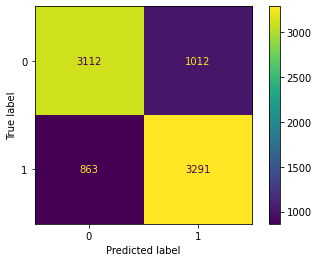



Confusion matrix for the test set
[[785 265]
 [244 776]]


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


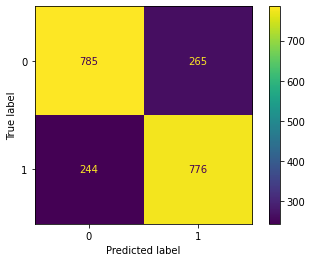

In [40]:
performance_KNN = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label =1),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 1),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 1
                                                    )]})

display(performance_KNN)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_mod,y_test, values_format = 'd')
plt.show()

In [41]:
# make predictions
y_pred_train_knn = neigh.predict(X_train_mod)
y_pred_test_knn  = neigh.predict(X_test_mod)

#performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
#performance_knn

In [42]:
y_pred_train_knn

array([0, 0, 0, ..., 1, 0, 0])

- Let's make a for loop to try others value for k neighbours

In [43]:
full_knn = pd.DataFrame()

models = {'k': [] }

for k in range(2,81):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_mod, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train_mod)
    y_pred_test_knn  = neigh.predict(X_test_mod)
    temp_knn = pd.DataFrame({'k': [k]*3, 'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label =1),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 1),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 1
                                                    )]})
    full_knn = pd.concat([full_knn,temp_knn], axis=0)

full_knn

,k,Error_metric,Train,Test
0,2,Accuracy,0.963639,0.823671
1,2,Precision,0.995372,0.830474
2,2,Recall,0.931873,0.806863
0,3,Accuracy,0.896352,0.790821
1,3,Precision,0.850788,0.745607
...,...,...,...,...
1,79,Precision,0.734899,0.732110
2,79,Recall,0.790804,0.782353
0,80,Accuracy,0.753201,0.754589
1,80,Precision,0.738747,0.738806


In [44]:
### Best accuracy
full_knn[full_knn['Error_metric'] == 'Accuracy']

,k,Error_metric,Train,Test
0,2,Accuracy,0.963639,0.823671
0,3,Accuracy,0.896352,0.790821
0,4,Accuracy,0.878231,0.788889
0,5,Accuracy,0.847065,0.778744
0,6,Accuracy,0.832810,0.769565
0,7,Accuracy,0.820971,0.770531
0,8,Accuracy,0.809978,0.762319
0,9,Accuracy,0.805388,0.762802
0,10,Accuracy,0.799468,0.755556
0,11,Accuracy,0.798019,0.761836


In [45]:
full_knn_2 = full_knn.melt(id_vars=['k','Error_metric'])
full_knn_2

,k,Error_metric,variable,value
0,2,Accuracy,Train,0.963639
1,2,Precision,Train,0.995372
2,2,Recall,Train,0.931873
3,3,Accuracy,Train,0.896352
4,3,Precision,Train,0.850788
...,...,...,...,...
469,79,Precision,Test,0.732110
470,79,Recall,Test,0.782353
471,80,Accuracy,Test,0.754589
472,80,Precision,Test,0.738806


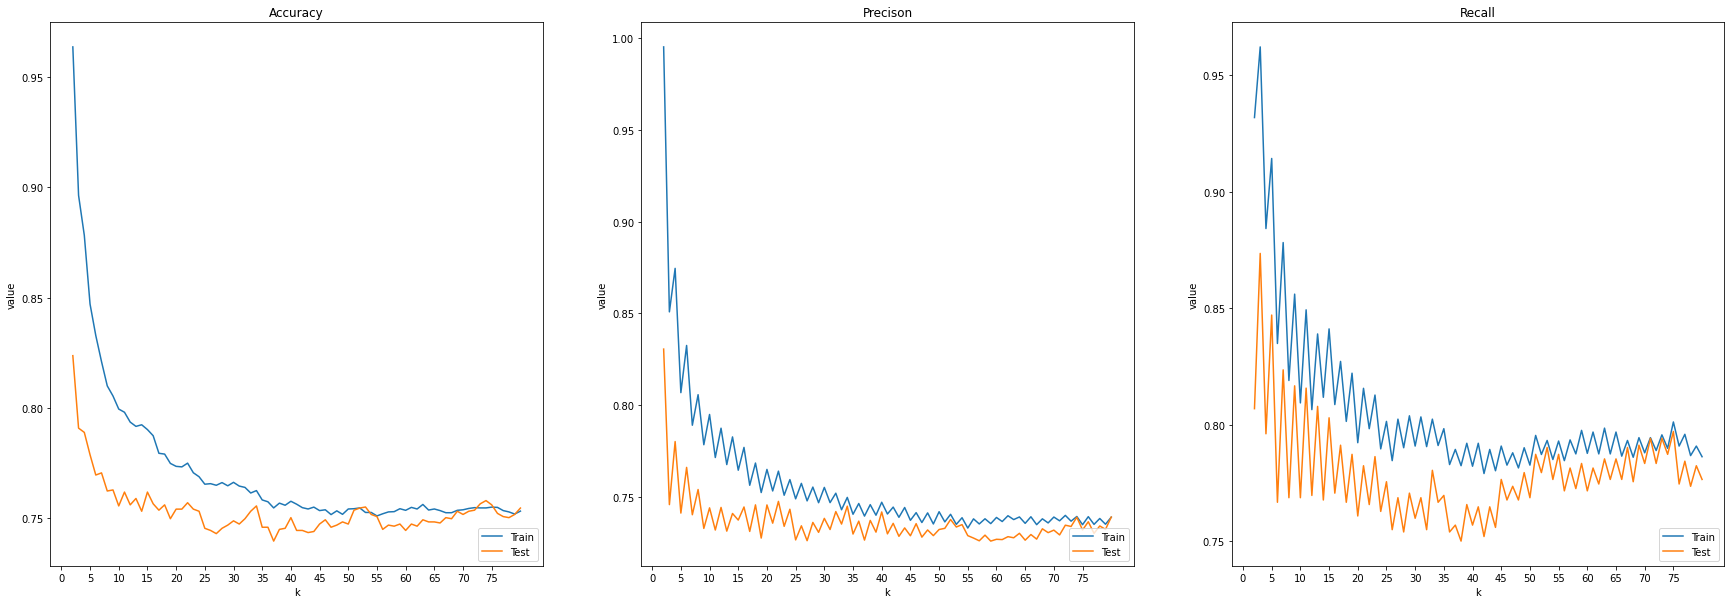

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(1,3, figsize=(30,10))
sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Accuracy'], hue = 'variable', ax = ax[0])
ax[0].set_xticks((np.arange(0, 80, 5)))
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower right')

sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Precision'], hue = 'variable', ax = ax[1])
ax[1].set_xticks((np.arange(0, 80, 5)))
ax[1].set_title("Precison")
ax[1].legend(loc='lower right')

sns.lineplot(x = 'k', y = 'value', data = full_knn_2[full_knn_2['Error_metric'] == 'Recall'], hue = 'variable', ax = ax[2])
ax[2].set_xticks((np.arange(0, 80, 5)))
ax[2].set_title("Recall")
ax[2].legend(loc='lower right')

In [47]:
full_knn_2[full_knn_2['k'] == 20]

,k,Error_metric,variable,value
54,20,Accuracy,Train,0.773496
55,20,Precision,Train,0.764815
56,20,Recall,Train,0.792248
291,20,Accuracy,Test,0.754106
292,20,Precision,Test,0.745437
293,20,Recall,Test,0.760784


In [48]:
full_knn_2[full_knn_2['k'] == 22]

,k,Error_metric,variable,value
60,22,Accuracy,Train,0.774946
61,22,Precision,Train,0.763879
62,22,Recall,Train,0.798267
297,22,Accuracy,Test,0.757005
298,22,Precision,Test,0.747368
299,22,Recall,Test,0.765686


In [49]:
full_knn_2[full_knn_2['k'] == 40]

,k,Error_metric,variable,value
114,40,Accuracy,Train,0.757671
115,40,Precision,Train,0.746897
116,40,Recall,Train,0.782138
351,40,Accuracy,Test,0.750242
352,40,Precision,Test,0.741595
353,40,Recall,Test,0.756863


For the moment I'll say 20 k

## 03. DECISION TREE

In [50]:
tree = DecisionTreeClassifier(max_depth=3)

- We don't need to use scaled data

In [51]:
tree.fit(X_train, y_train)

y_pred_train_dt = tree.predict(X_train)
y_pred_test_dt = tree.predict(X_test)


performance_dt = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

In [52]:
display(performance_dt)

,Error_metric,Train,Test
0,Accuracy,0.738343,0.734300
1,Precision,0.697144,0.689822
2,Recall,0.846172,0.837255


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


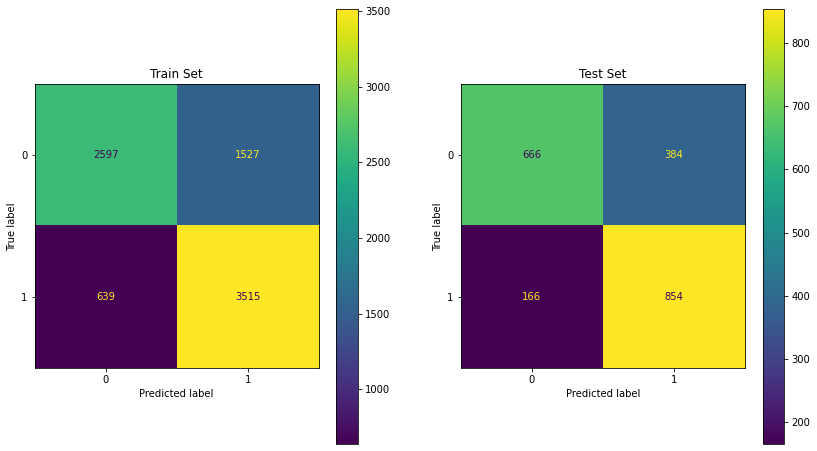

In [53]:
fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(tree,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(tree,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

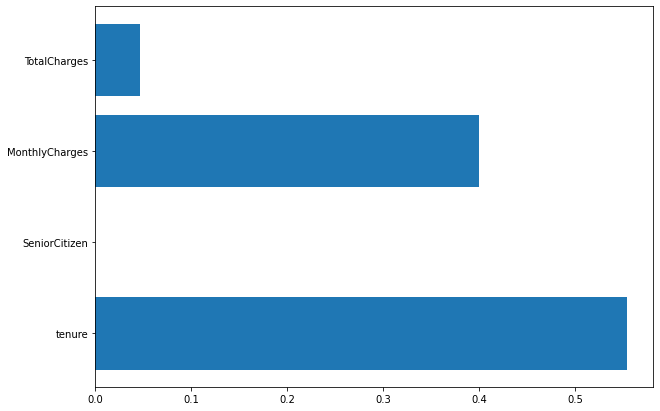

In [54]:
plt.figure(figsize=(10,7))
plt.barh(X.columns,tree.feature_importances_)

In [55]:
X["tenure"].unique()

array([21,  1, 10, 37, 13, 31, 65, 32,  6, 71, 38, 72,  3, 54, 51, 66, 61,
       39, 42, 34, 69, 30, 33,  2, 70, 52, 22, 29,  9, 11,  4, 67, 27, 50,
       28,  5,  7, 49, 19, 24, 23, 64, 35, 15, 43, 17, 16, 25, 14, 40, 53,
       59, 47, 44, 56, 45, 48,  8, 63, 46, 62, 26, 57, 18, 12, 58, 36, 20,
       60, 41, 68, 55,  0])

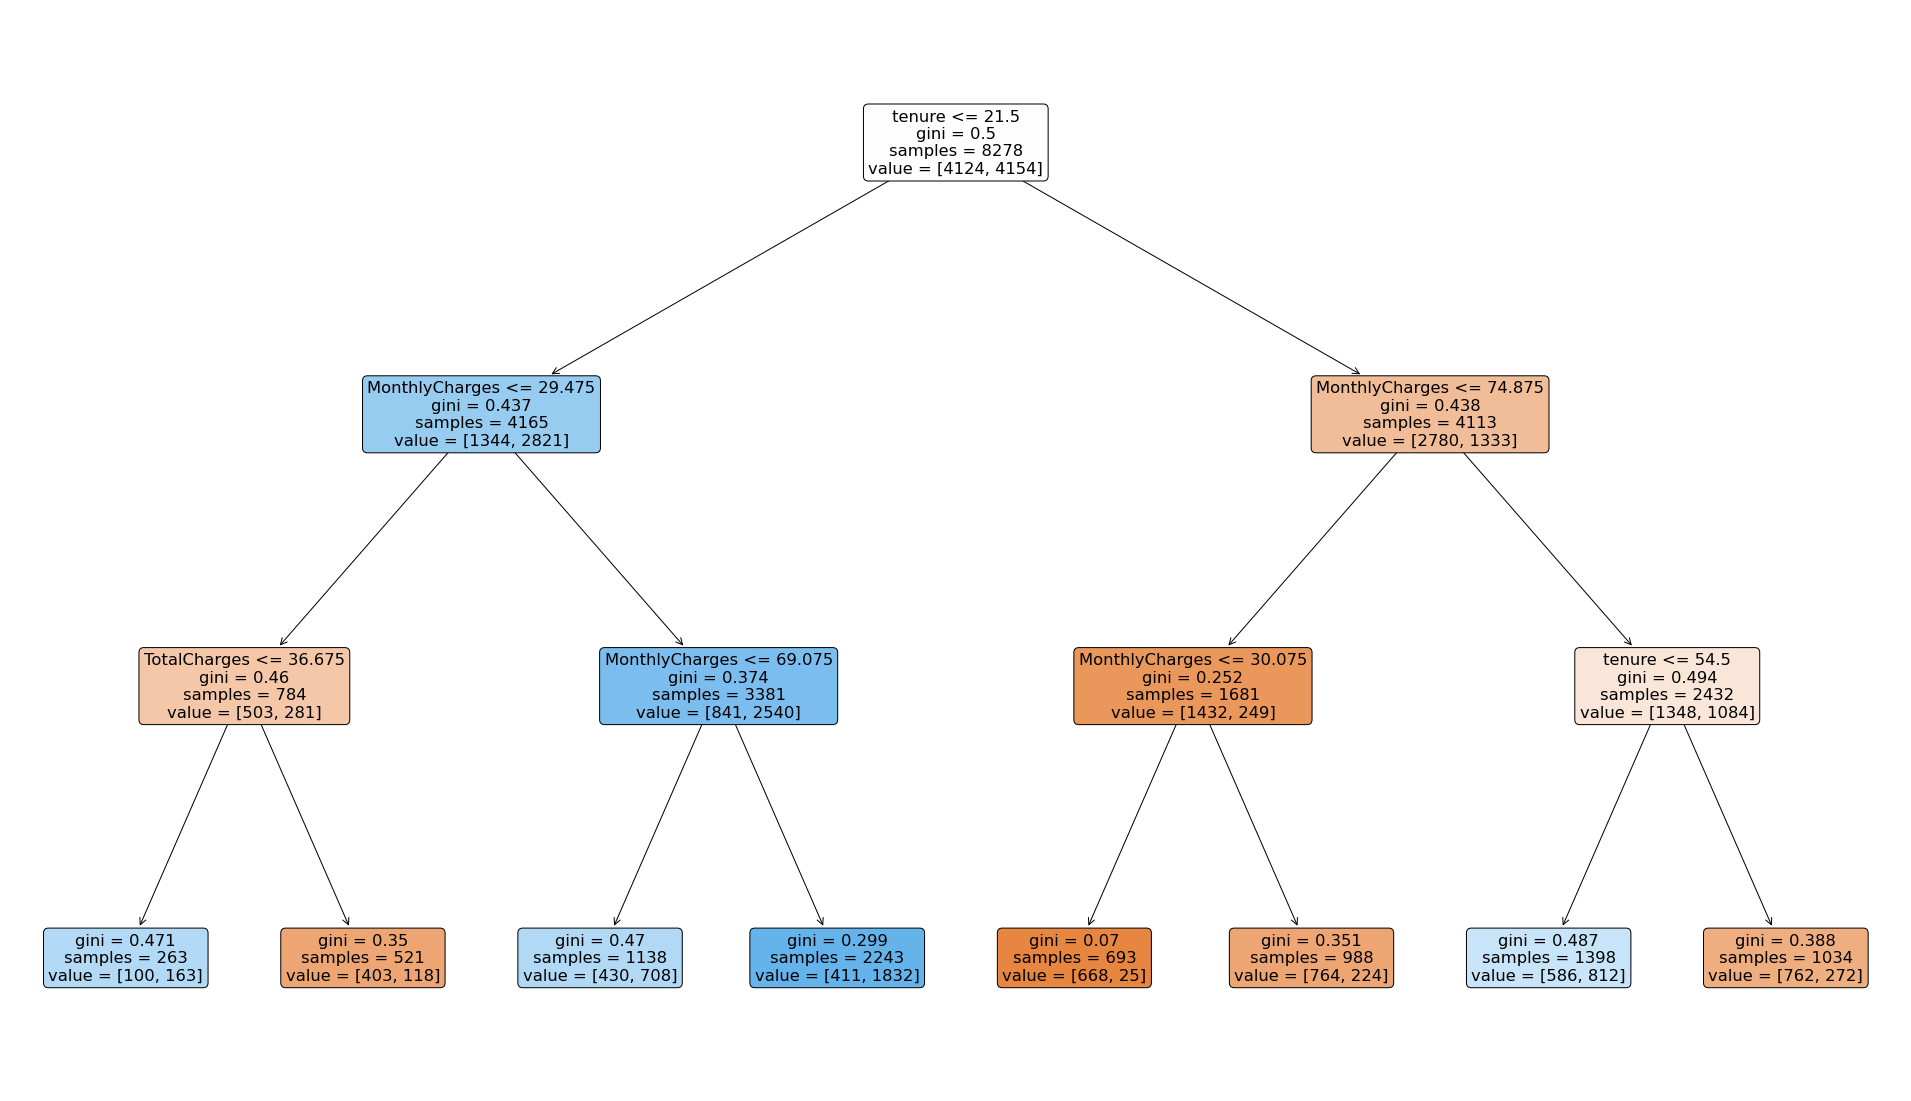

In [56]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(tree,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [57]:
len(X_train)

8278

In [58]:
X_train["tenure"].mean()

27.798985262140615

In [59]:
X_train.describe()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
count,8278.000000,8278.000000,8278.000000,8278.000000
mean,27.798985,0.191955,68.187515,2051.987679
std,24.050226,0.393861,28.743834,2186.467365
min,0.000000,0.000000,18.250000,18.800000
25%,5.000000,0.000000,45.700000,273.000000
50%,21.000000,0.000000,74.900000,1178.575000
75%,49.000000,0.000000,91.050000,3274.250000
max,72.000000,1.000000,118.750000,8684.800000


We see that senior citizen doesn't affect (feature importance is 0), let's try not include it on the decision tree

In [60]:
performance_log

,Error_metric,Train,Test
0,Accuracy,0.735202,0.741063
1,Precision,0.731150,0.733591
2,Recall,0.746991,0.745098


In [61]:
performance_KNN

,Error_metric,Train,Test
0,Accuracy,0.773496,0.754106
1,Precision,0.764815,0.745437
2,Recall,0.792248,0.760784


In [62]:
performance_dt

,Error_metric,Train,Test
0,Accuracy,0.738343,0.734300
1,Precision,0.697144,0.689822
2,Recall,0.846172,0.837255


### K-fold cross validation on your models 

<b>Log model

In [63]:
#log_model
log_scores=cross_val_score(log_model, X_train_mod, y_train, cv=10)
log_scores

array([0.71376812, 0.72826087, 0.74033816, 0.74154589, 0.76328502,
       0.72705314, 0.71859903, 0.74275362, 0.71825877, 0.75211608])

In [64]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (log_scores.mean(), log_scores.std()))

0.73 accuracy with a standard deviation of 0.02


<b>Knn classifier

In [65]:
#neigh
neigh_scores=cross_val_score(neigh, X_train_mod, y_train, cv=10)
neigh_scores

array([0.73067633, 0.73550725, 0.75362319, 0.74396135, 0.76932367,
       0.73671498, 0.73309179, 0.73913043, 0.76662636, 0.75453446])

In [66]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (neigh_scores.mean(), neigh_scores.std()))

0.75 accuracy with a standard deviation of 0.01


<b>Decision tree

In [67]:
#tree
tree_scores=cross_val_score(tree, X_train, y_train, cv=10)
tree_scores

array([0.70772947, 0.73671498, 0.73671498, 0.72705314, 0.74396135,
       0.69806763, 0.73550725, 0.71256039, 0.73639661, 0.73397823])

In [68]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (tree_scores.mean(), tree_scores.std()))

0.73 accuracy with a standard deviation of 0.01


In [69]:
model_pipeline = [log_model, neigh, tree]
model_names = ['LOG', 'KNN', 'DT']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'LOG': 0.7373755418363326, 'KNN': 0.712250755287009, 'DT': 0.7309734080593138}


## 04. RANDOM FOREST CLASSIFIER

<b> We don't need to use scaled data on decision trees!!

In [72]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.8707446156003014


### Tune the hyper parameters with gridsearch

In [105]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,500],  #numbers of models
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt'],
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [106]:
grid_search = GridSearchCV(clf, param_grid, cv=10,return_train_score=True,n_jobs=-1,)

In [107]:
grid_search.fit(X_train,y_train)

/home/dani/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [108]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

<b> Using the best parameters

In [109]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=100, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=500)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.8712271232380585
